In [162]:
%pylab inline
import yt
import yt.units as units
from matplotlib import animation
from tempfile import NamedTemporaryFile
from IPython.display import HTML
from matplotlib.backends.backend_agg import FigureCanvasAgg

Populating the interactive namespace from numpy and matplotlib


In [163]:
VIDEO_TAG = """<video controls>
 <source src="data:video/x-webm;base64,{0}" type="video/webm">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.webm') as f:
            anim.save(f.name, fps=6, extra_args=['-vcodec', 'libvpx'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)

In [164]:
def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

In [204]:
bbox = [[-89000, 89000],
        [-89000, 89000],
        [-89000, 89000]]
 
ds = yt.load('../data/ICs/MW/paul/MWN2vir_020.hdf5', bounding_box=bbox)
ds.index
ad= ds.all_data()


yt : [INFO     ] 2016-03-03 17:29:21,253 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2016-03-03 17:29:21,253 Assuming length units are in kpc (physical)
yt : [INFO     ] 2016-03-03 17:29:21,258 Parameters: current_time              = 1.99999999255
yt : [INFO     ] 2016-03-03 17:29:21,258 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2016-03-03 17:29:21,258 Parameters: domain_left_edge          = [-89000. -89000. -89000.]
yt : [INFO     ] 2016-03-03 17:29:21,259 Parameters: domain_right_edge         = [ 89000.  89000.  89000.]
yt : [INFO     ] 2016-03-03 17:29:21,259 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2016-03-03 17:29:21,261 Allocating for 1.600e+06 particles
yt : [INFO     ] 2016-03-03 17:29:21,479 Identified 9.611e+04 octs
yt : [INFO     ] 2016-03-03 17:29:21,544 Loading field plugins.
yt : [INFO     ] 2016-03-03 17:29:21,545 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-03-03 17:29:21,545 Loaded astr


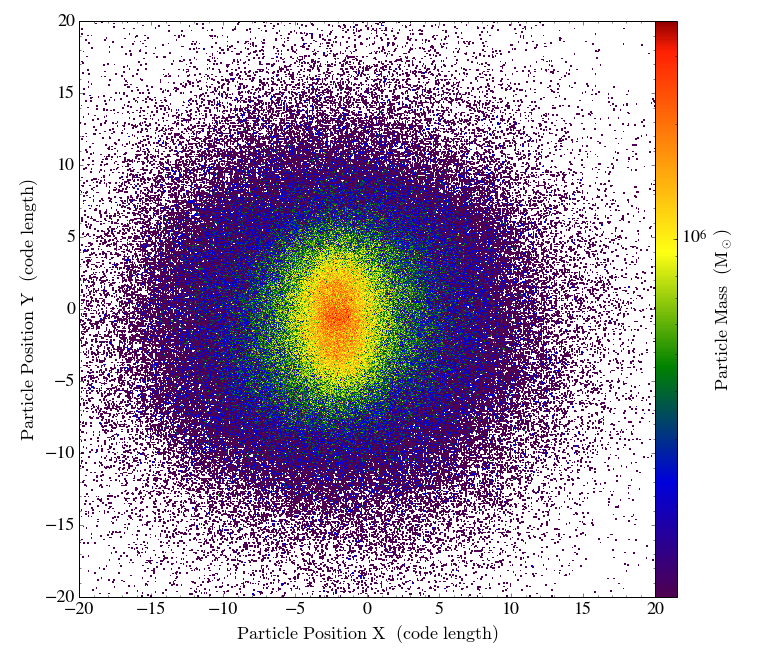

yt : [INFO     ] 2016-03-03 17:29:26,962 Saving plot MW1_2d-Profile_particle_position_x_particle_position_y_particle_mass.png


['MW1_2d-Profile_particle_position_x_particle_position_y_particle_mass.png']

In [205]:
p = yt.ParticlePlot(ds, ('PartType2','particle_position_x'), ('PartType2','particle_position_y'), ('PartType2','particle_mass'))
p.set_unit('particle_mass', 'Msun')
p.set_xlim(-20, 20)
p.set_ylim(-20, 20)
#p.zoom(80)
p.show()
p.save('MW1')

In [169]:
def animate(i):
    ds = yt.load('../data/ICs/MW/paul/MWN2vir_%03i.hdf5' % i)
    prj._switch_ds(ds)

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(p, animate, frames=30, interval=200, blit=False)

AttributeError: 'ParticlePhasePlot' object has no attribute 'canvas'